In [3]:
!pip install python-twitter
#Directions
#1 sign up for twitter
#2 Go to https://apps.twitter.com/
#3 Create an App
#4 Should be able toi use http://www.marymount.edu for webpage if you do not have one
#5 once created go to Keys and Access tokens
#6 Generate Access Token
#7 use this data for the fields below
#get credentials

import twitter
from operator import itemgetter
import nltk #NLP Library to perform NLP actions
import pandas as pd #read data frames easier
from nltk.corpus import stopwords #corpus and filtering of certain words
from matplotlib import pyplot as plt #visualization library

#operator is built-in module providing a set of convenient operators. In two words 

#Operator.itemgetter constructs a callable that assumes an iterable object (ex:list, tuple, set) 
#as input, and fetches the (n-th element) out of it.


In [4]:
#fill these in
api = twitter.Api(consumer_key='##########',
                      consumer_secret='#########',
                      access_token_key='########',
                      access_token_secret='######',
                  tweet_mode='extended')




def get_tweets(handle,since_id=0,max_id=0,count=200):
    if max_id == 0:
        statuses = api.GetUserTimeline(screen_name=handle, count=count, exclude_replies=True, include_rts=False,since_id=since_id)
    else:
        statuses = api.GetUserTimeline(screen_name=handle, count=count, exclude_replies=True, include_rts=False,max_id=max_id)
    return statuses

#Joe Biden Tweets
statuses=get_tweets(handle='JoeBiden')
with open ("corpus.txt","w",encoding="utf8") as outFile:
    for s in statuses:
        print(s.full_text)
        outFile.write(s.full_text+"\n")

#BleacherReport Tweets      
statuses=get_tweets(handle='BleacherReport')
with open ("corpus1.txt","w",encoding="utf8") as outFile:
    for s in statuses:
        print(s.full_text)
        outFile.write(s.full_text+"\n")

#Beyonce Tweets        
statuses=get_tweets(handle='Beyonce')
with open ("corpus2.txt","w",encoding="utf8") as outFile:
    for s in statuses:
        print(s.full_text)
        outFile.write(s.full_text+"\n")

If Congress and President Trump fail to act by the end of December:

- 12 million Americans will lose unemployment benefits
- Emergency paid leave will end
- The moratorium on evictions will expire 

The situation is urgent. Americans need help and they need it now.
Our country is in the middle of a dramatic spike in COVID-19 cases. Please wear a mask, keep social distancing, and limit the size of any groups. It’s our patriotic duty as Americans.
With less than 50 days until Inauguration Day, now is the perfect time to stock up on gear to celebrate. Head to https://t.co/j1ZK7kQnaE to find everything you need.
On the day I’m inaugurated, I’ll call on the public to wear a mask for 100 days.

Let’s keep our fellow Americans safe and save lives. https://t.co/HrMbxNgXrw
To everyone who is struggling, I promise you help is on the way. https://t.co/uDcagQAJd2
I nominated @neeratanden to lead OMB because she's a brilliant policy mind with experience across government. She will help us control 

DeMar DeRozan reportedly chased down an intruder at his LA-area home last month, per @TMZ_Sports

The intruder told police he mistakenly entered DeRozan's house while looking for Kylie Jenner's house https://t.co/bjw0ILAlC7
The two connected for 269 yards in Week 12 👀

Play Perfect Picks from @br_betting for a chance to win a $100 gift card. Enter in the B/R app ahead of Broncos vs. Chiefs on SNF and hit on your parlay 📲  https://t.co/2B9mhWAdWV https://t.co/9SCw7XM9U4
NBA issues bans on bars and clubs in 2020-21 health and safety guidelines, per @wojespn

On the road, players and staff can dine at "approved restaurants" outdoors or in a "fully privatized space" https://t.co/34Gzgg4nPm
USMNT’s Weston McKennie scores his first Serie A goal 🇺🇸 @brfootball 

He’s the first American to score for Juventus https://t.co/ZM00Ml1t04
Bo Nix with the most absurd play of the day 😱

(via @SECNetwork)
https://t.co/8afMPw9063
Klay Thompson dropped 60 points in three quarters on this day in 2016.

Goi

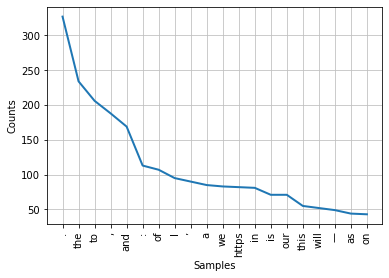

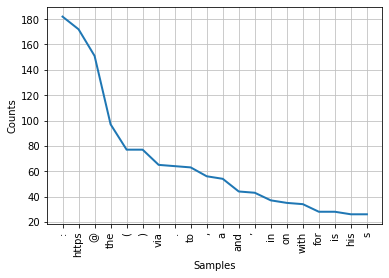

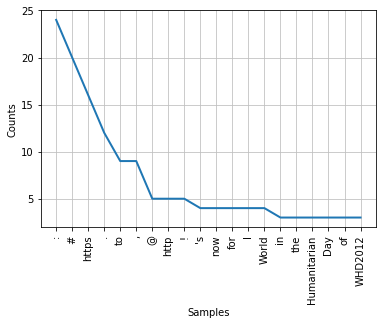

In [5]:
#Plot Distrbutions of Frequency Distrubtions Simplfied down (Try playing with paramters to change plots)
#I used 20

#JOE BIDEN
f = open("corpus.txt", "r", encoding = "utf8")
inputfile = f.read()
tokens = nltk.tokenize.word_tokenize(inputfile)
fd = nltk.FreqDist(tokens)
fd.plot(20,cumulative=False)

#Bleacher Report
f = open("corpus1.txt", "r", encoding = "utf8")
inputfile = f.read()
tokens = nltk.tokenize.word_tokenize(inputfile)
fd = nltk.FreqDist(tokens)
fd.plot(20,cumulative=False)

#Beyonce
f = open("corpus2.txt", "r", encoding = "utf8")
inputfile = f.read()
tokens = nltk.tokenize.word_tokenize(inputfile)
fd = nltk.FreqDist(tokens)
fd.plot(20,cumulative=False)

In [6]:
#Building the Zipf curve plot



#JOE BIDEN
frequency = {}
f=open('corpus.txt','r', encoding ='utf8')
raw=f.read()
tokens = nltk.word_tokenize(raw)
words_doc = nltk.Text(tokens)
stop_words = set(stopwords.words('english'))

#Bleacher REPORT
frequency = {}
f=open('corpus1.txt','r', encoding ='utf8')
raw1=f.read()
tokens = nltk.word_tokenize(raw1)
words_doc1 = nltk.Text(tokens)
stop_words = set(stopwords.words('english'))

#BEYONCE
frequency = {}
f=open('corpus2.txt','r', encoding ='utf8')
raw2=f.read()
tokens = nltk.word_tokenize(raw2)
words_doc2 = nltk.Text(tokens)
stop_words = set(stopwords.words('english'))

In [7]:
#Case sensitive checker 
words_doc = [word.lower() for word in words_doc if word.isalpha()]
words_doc = [word for word in words_doc if word not in stop_words]

words_doc1 = [word.lower() for word in words_doc1 if word.isalpha()]
words_doc1 = [word for word in words_doc1 if word not in stop_words]

words_doc2 = [word.lower() for word in words_doc2 if word.isalpha()]
words_doc2 = [word for word in words_doc2 if word not in stop_words]

In [8]:
#Dataframe Build for all 3 users
for word in words_doc :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1
############################################################
rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)
df.head(10)
for word1 in words_doc1 :
    count = frequency.get(word1 , 0)
    frequency[ word1 ] = count + 1
######################################################
rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df1 = pd.DataFrame( columns = column_header )
collection1 = sorted(frequency.items(), key=itemgetter(1), reverse = True)
df1.head(10)
for word2 in words_doc2 :
    count = frequency.get(word2 , 0)
    frequency[ word2 ] = count + 1
###################################################
rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df2 = pd.DataFrame( columns = column_header )
collection2 = sorted(frequency.items(), key=itemgetter(1), reverse = True)
df2.head(10)

,Rank,Frequency,Frequency * Rank


In [9]:
# Frequency Ranker
for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

print (df)
#############################################
for word1 , freq1 in collection1:
    df1.loc[word1] = [rank, freq1, rank*freq1]
    rank = rank + 1

print (df1)
######################################################
for word2 , freq2 in collection2:
    df2.loc[word2] = [rank, freq2, rank*freq]
    rank = rank + 1

print (df2)

           Rank Frequency Frequency * Rank
https         1        82               82
us            2        28               56
work          3        25               75
americans     4        24               96
people        5        23              115
...         ...       ...              ...
línea       961         1              961
directa     962         1              962
de          963         1              963
asistencia  964         1              964
votante     965         1              965

[965 rows x 3 columns]
         Rank Frequency Frequency * Rank
https     966       254           245364
via       967        65            62855
back      968        30            29040
us        969        28            27132
going     970        28            27160
...       ...       ...              ...
waivers  2693         1             2693
kirk     2694         1             2694
derrick  2695         1             2695
henry    2696         1             2696
fantasy  

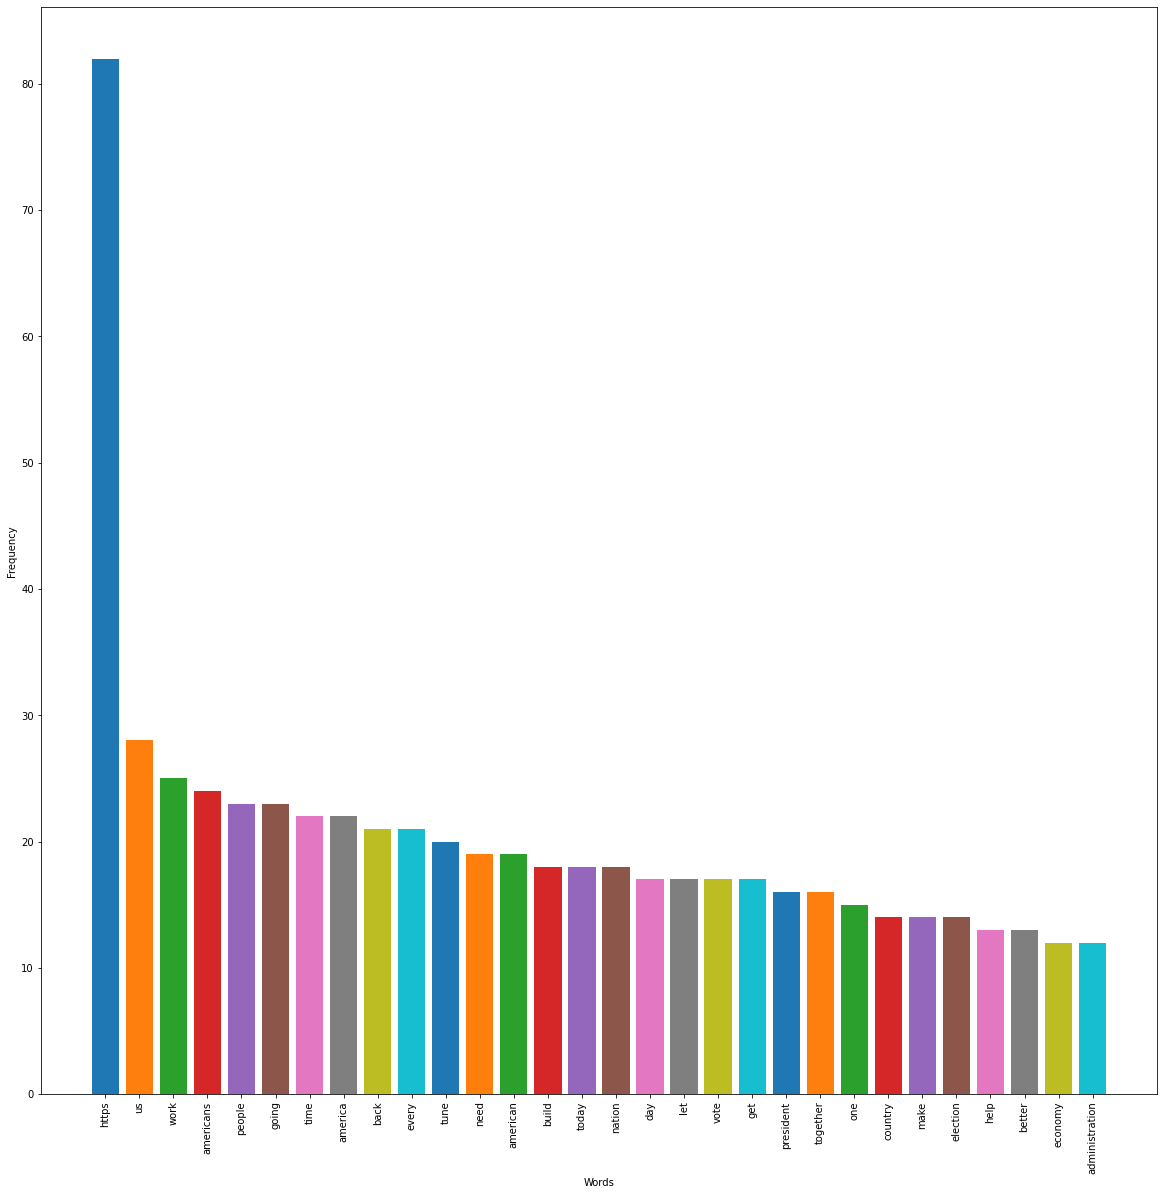

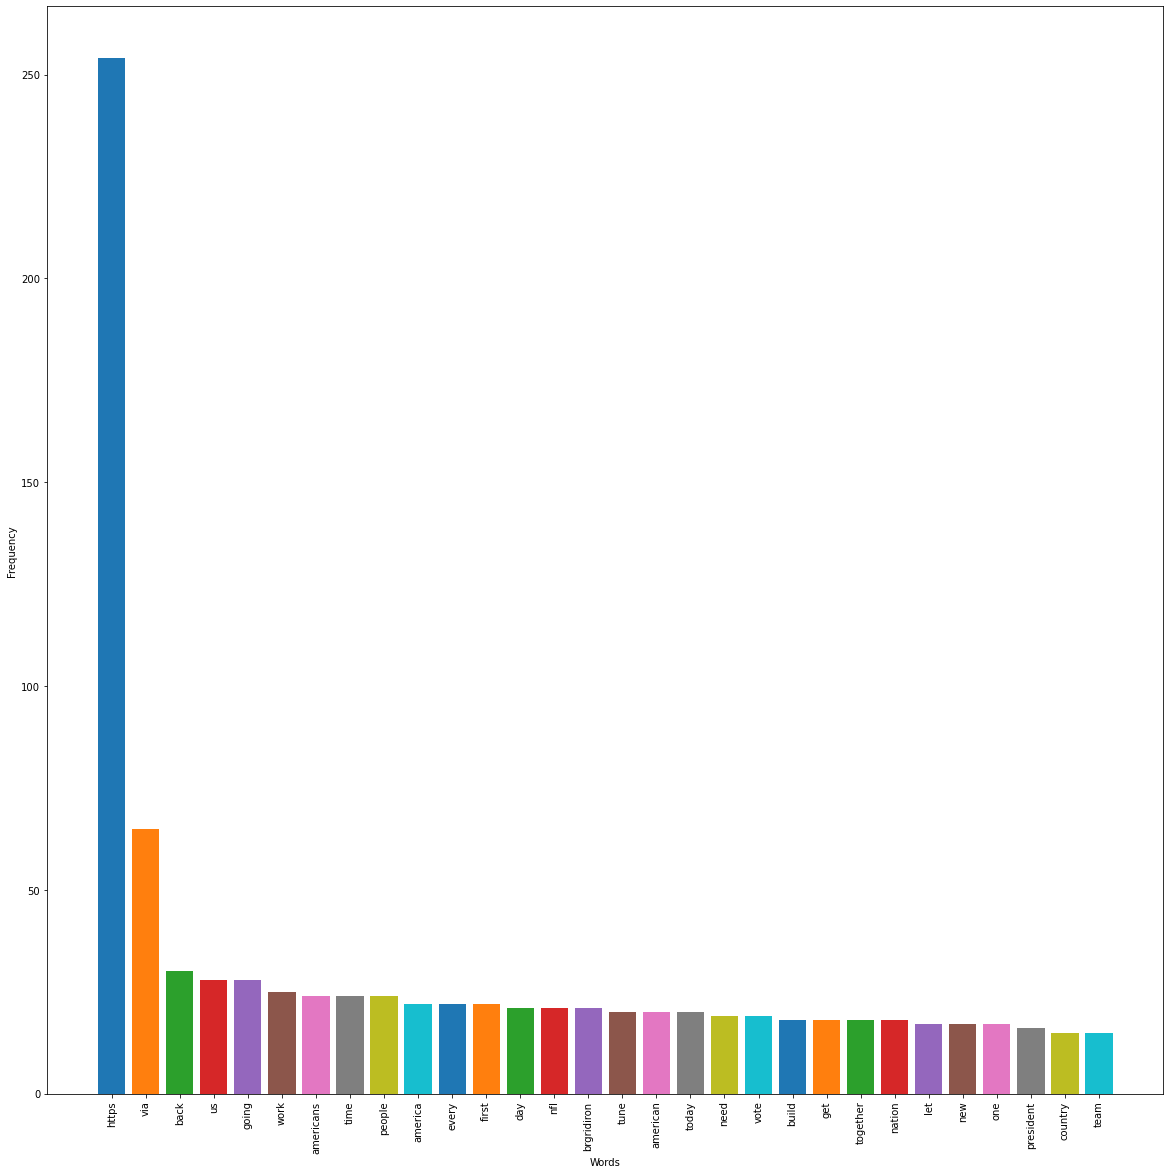

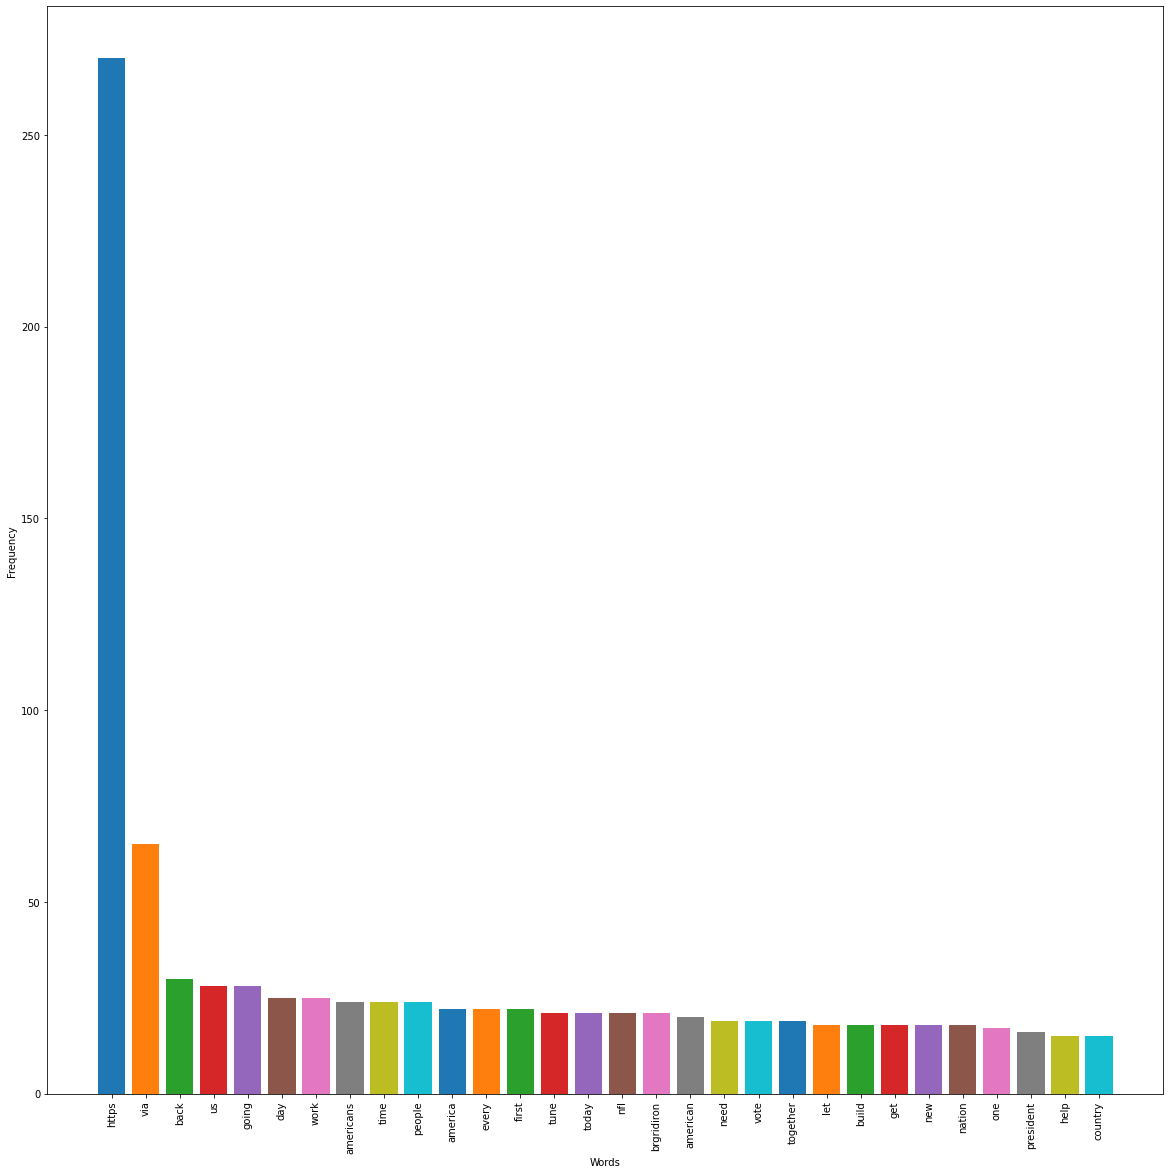

In [11]:
#JOE, BLECACHERREPORT, BEYONCE Visualization Plot based on Ranker above to get overall visualization and score
#and meaning
plt.figure(figsize=(20,20))  #to increase the plot resolution # #
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values #Play to test

for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()
##########################################
plt.figure(figsize=(20,20))  
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    
#################################################
for word1 , freq1 in collection1[:30]:
    plt.bar(word1, freq1)    
plt.show()
########################################################
plt.figure(figsize=(20,20))  
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90) 

for word2 , freq2 in collection2[:30]:
    plt.bar(word2, freq2)    
plt.show()

NameError: name 'plt' is not defined